# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

<br>


### modules import


In [119]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### 데이터셋 로드

In [126]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.3, random_state=111)

<br>

### 데이터 확인

In [127]:
print("전체 학습 데이터:  {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터:  {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터:  {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터:  {}\t레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터:  (60000, 28, 28)	레이블: (60000,)
학습 데이터:  (42000, 28, 28)	레이블: (42000,)
검증 데이터:  (18000, 28, 28)	레이블: (18000,)
테스트 데이터:  (10000, 28, 28)	레이블: (10000,)


In [128]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [129]:
class_names[y_train[0]]

'Pullover'

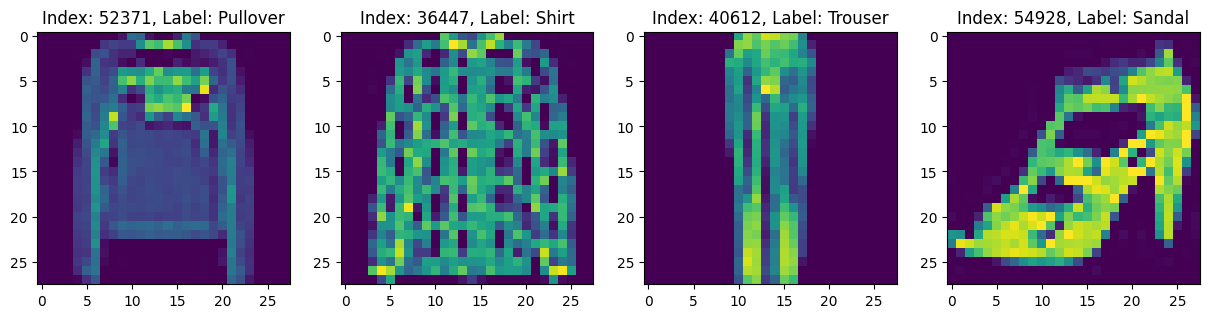

In [130]:
num_sample = 4

random_idx = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idx):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idx), i+1)
  plt.imshow(img)
  plt.title('Index: {}, Label: {}'.format(idx, class_names[label]))

<br>

### 데이터 전처리
- Normalization

- flatten

- loss='sparse_categorical_crossentropy'

In [131]:
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28))/ 255.

<br>

### 모델 구성 (함수형 API)

In [136]:
input = Input(shape=(28*28, ), name='input')
hidden1 = Dense(256, activation='relu', name='hidden1')(input)
hidden2 = Dense(128, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hidden4')(hidden3)
output = Dense(10, activation='softmax', name='output')(hidden4)

model = Model(inputs=[input], outputs=output)

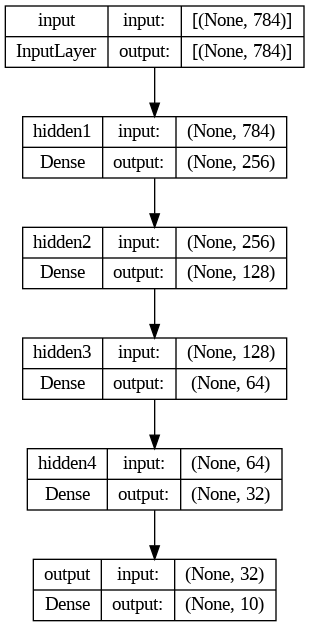

In [137]:
plot_model(model, show_shapes=True)

<br>

### 모델 컴파일

In [139]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['acc'])

<br>

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [140]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 4s 7ms/step - loss: 0.8938 - acc: 0.6796 - val_loss: 0.6704 - val_acc: 0.7488
Epoch 2/10
329/329 [==============================] - 1s 5ms/step - loss: 0.5172 - acc: 0.8120 - val_loss: 0.6635 - val_acc: 0.7924
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4664 - acc: 0.8331 - val_loss: 0.4845 - val_acc: 0.8432
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4382 - acc: 0.8433 - val_loss: 0.5328 - val_acc: 0.7803
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4286 - acc: 0.8512 - val_loss: 0.4655 - val_acc: 0.8439
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4154 - acc: 0.8561 - val_loss: 0.7431 - val_acc: 0.7721
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4104 - acc: 0.8573 - val_loss: 0.4653 - val_acc: 0.8244
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - loss: 0.

<br>

### 학습 결과 시각화

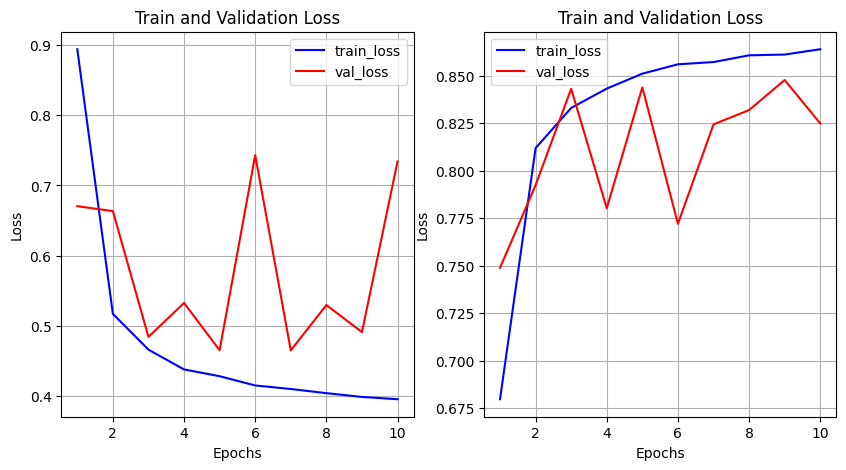

In [141]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_loss')
ax2.plot(epochs, val_acc, color='red', label='val_loss')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()

<br>

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [142]:
from tensorflow.keras.optimizers import SGD

In [143]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

In [144]:
history2 = model.fit(x_train, y_train, 
                     epochs=10,
                     batch_size=128,
                     validation_data=(x_val, y_val), verbose=False)

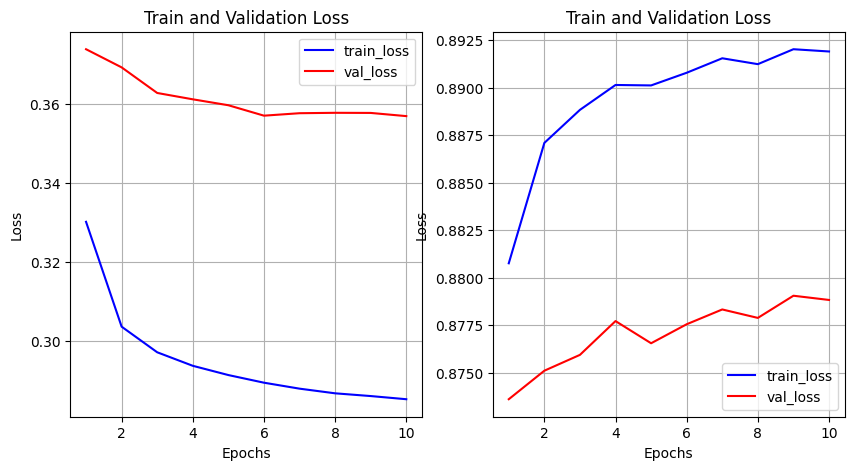

In [145]:
history_dict2 = history2.history

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
acc = history_dict2['acc']
val_acc = history_dict2['val_acc']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_loss')
ax2.plot(epochs, val_acc, color='red', label='val_loss')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [146]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3915 - acc: 0.8717


[0.39153003692626953, 0.8716999888420105]

<br>

### 학습된 모델을 통해 값 예측

In [147]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[6.5049951e-18 7.1846452e-20 4.3458796e-16 2.9806530e-22 2.0736405e-14
 1.0260215e-02 1.8587427e-14 2.7239960e-02 1.3015065e-09 9.6249986e-01]


In [152]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(pred_ys)

  if predicted_label == y_test:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

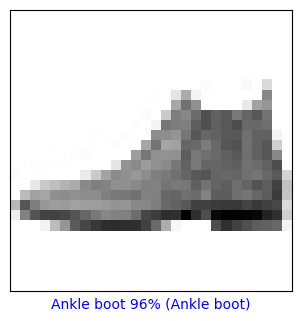

In [163]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))

<br>

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [165]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

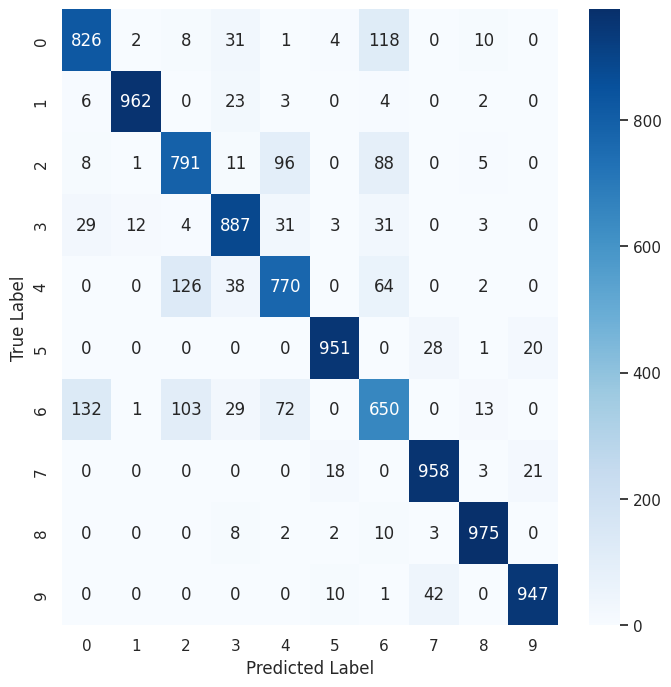

In [166]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<br>

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [167]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.86      0.89      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.96      0.95      0.96      1000
           6       0.67      0.65      0.66      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

